In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### **Data Exploration**

In [3]:
# Load the dataset
creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df.info()
creditcard_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display the statistics of the dataset
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check for unique, missing and duplicated values
inspection_df = pd.DataFrame({
    'Unique': creditcard_df.nunique(),
    'Missing': creditcard_df.isnull().sum(),
    'Type': creditcard_df.dtypes,
    'Sample': creditcard_df.loc[0],
    'Duplicate': creditcard_df.duplicated().sum()
})
inspection_df

,Unique,Missing,Type,Sample,Duplicate
Time,124592,0,float64,0.000000,1081
V1,275653,0,float64,-1.359807,1081
V2,275655,0,float64,-0.072781,1081
V3,275657,0,float64,2.536347,1081
V4,275654,0,float64,1.378155,1081
V5,275657,0,float64,-0.338321,1081
V6,275652,0,float64,0.462388,1081
V7,275651,0,float64,0.239599,1081
V8,275643,0,float64,0.098698,1081
V9,275656,0,float64,0.363787,1081


In [6]:
# Count the samples for each class in the target variable
creditcard_df['class'].value_counts()

class
0    284315
1       492
Name: count, dtype: int64

#### **Data Visualization**

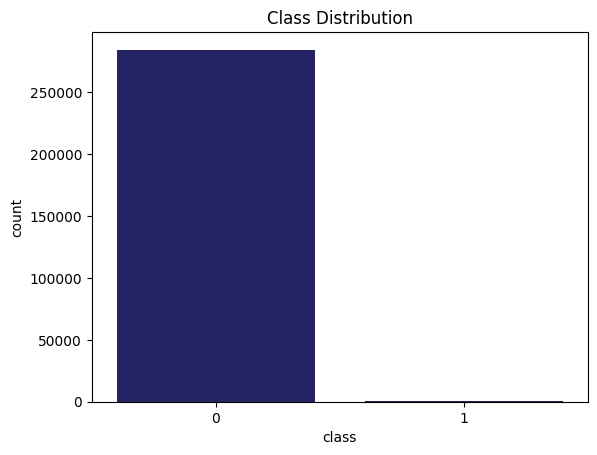

In [45]:
# Visualize the class distribution
sns.countplot(x='class', data=creditcard_df, color='midnightblue')
plt.title('Class Distribution')
plt.show()

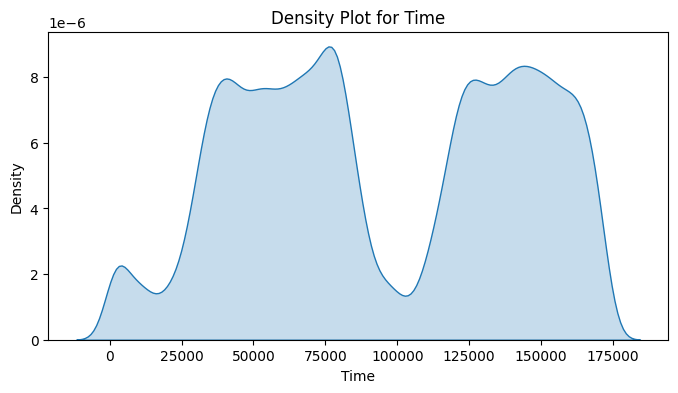

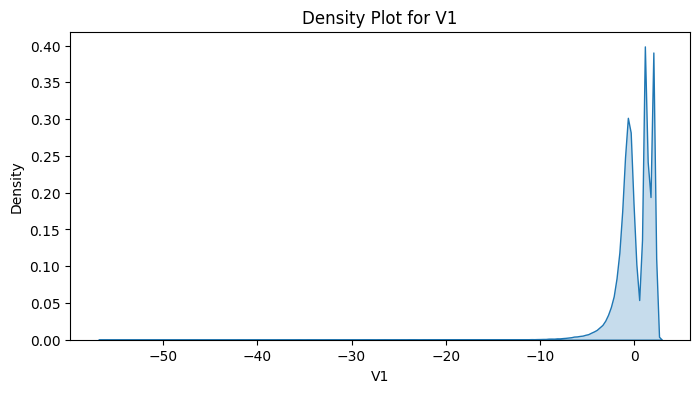

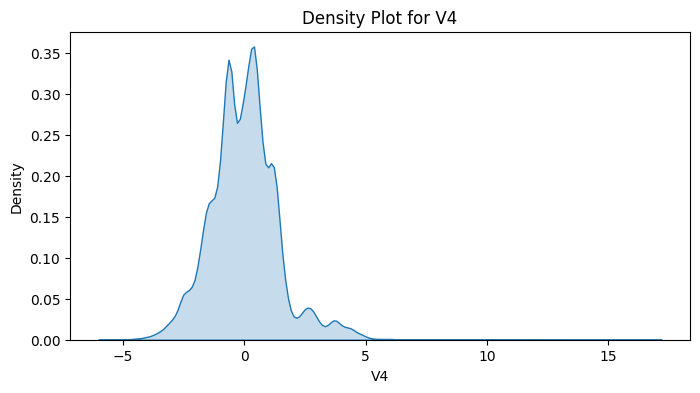

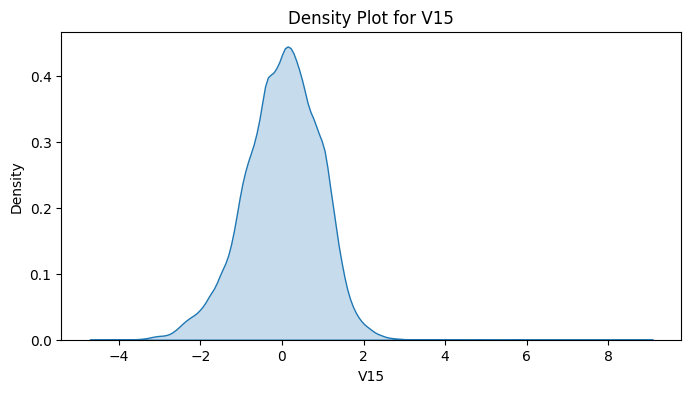

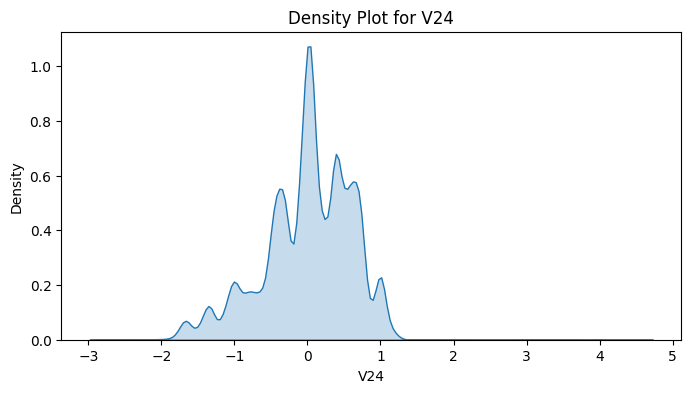

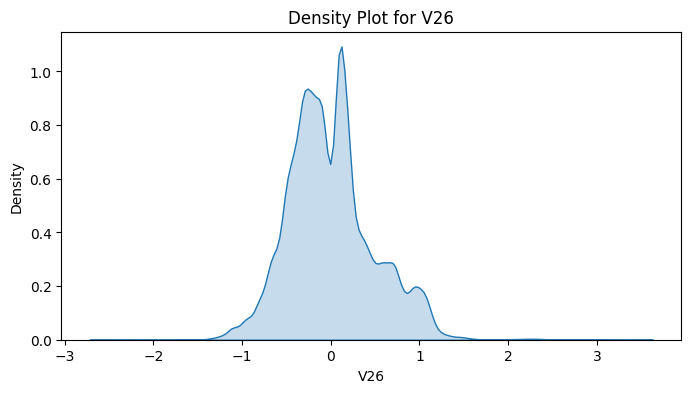

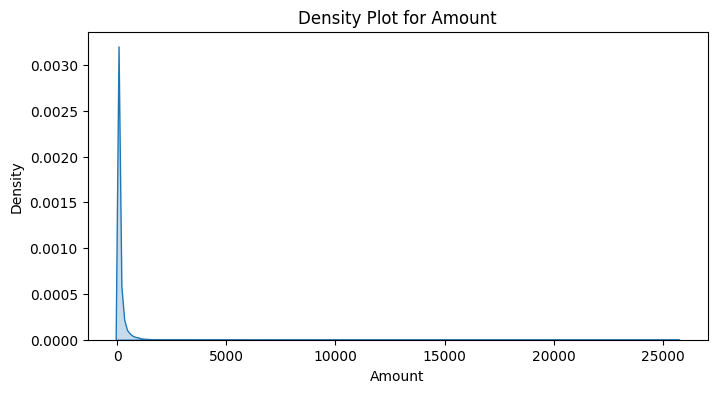

In [ ]:
# Visualize the density plots for selected features
selected_features = ['Time', 'V1', 'V4', 'V15', 'V24', 'V26', 'Amount']
for feature in selected_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=creditcard_df, x=feature, fill=True)
    plt.title(f'Density Plot for {feature}')
    plt.show()

#### **Model Training**

In [7]:
# Split the dataset into features and target variable
X = creditcard_df.drop(columns='class')
y = creditcard_df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

train_test_shape = pd.DataFrame({
    'Training' : (X_train.shape[0], y_train.shape[0]),
    'Testing' : (X_test.shape[0], y_test.shape[0]),
    'Total' : (X.shape[0], y.shape[0])
})
train_test_shape

,Training,Testing,Total
0,199364,85443,284807
1,199364,85443,284807


In [8]:
# Create a pipeline with a logistic regression model
simp_imputer = SimpleImputer(strategy='mean')
std_scaler = StandardScaler()
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01)
def_pipeline = Pipeline([
    ('imputer', simp_imputer),
    ('scaler', std_scaler),
    ('model', log_reg)
])

In [9]:
# Peform hyperparameter tuning using GridSearchCV
param_grid = {
    'model__C': [0.1, 316.23, 1_000_000],
    'model__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(def_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 316.23, 1000000],
                         'model__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]})

#### **Model Evaluation**

In [18]:
# Display the best score and parameters
best_score = grid_search.best_score_
print(f'Best Score: {best_score:.4f}')
print('Best Parameters:', grid_search.best_params_)

Best Score: 0.9992
Best Parameters: {'model__C': 316.23, 'model__l1_ratio': 0.0}


In [11]:
# Calculate the accuracy from the best classifier model
best_model = grid_search.best_estimator_
y_pred_def = best_model.predict(X_test)
def_accuracy = accuracy_score(y_test, y_pred_def)
print(f'Accuracy: {def_accuracy:.4f}')

Accuracy: 0.9992


In [ ]:
# Get predicted probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
gmeans = np.sqrt(tpr * (1 - fpr))

# Identify the best threshold by maximizing G-mean
best_idx = np.argmax(gmeans)
best_thresh = thresholds[best_idx]
print(f'Best Threshold: {best_thresh:.4f}')
print(f'Best G-Mean: {gmeans[best_idx]:.4f}')

Best Threshold: 0.0034
Best G-Mean: 0.9526


In [73]:
# Display the classification report of default model
def_y_pred = best_model.predict(X_test)
def_report = classification_report(y_test, def_y_pred)
print('Classification Report of Default Model')
print(def_report)

Classification Report of Default Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.83      0.62      0.71       141

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [75]:
# Display the classification report of optimal threshold
opt_y_pred = (y_pred_proba >= best_thresh)
opt_report = classification_report(y_test, opt_y_pred)
print('Classification Report of Optimal Threshold')
print(opt_report)

Classification Report of Optimal Threshold
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85302
           1       0.05      0.94      0.09       141

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



#### **Model Visualization**

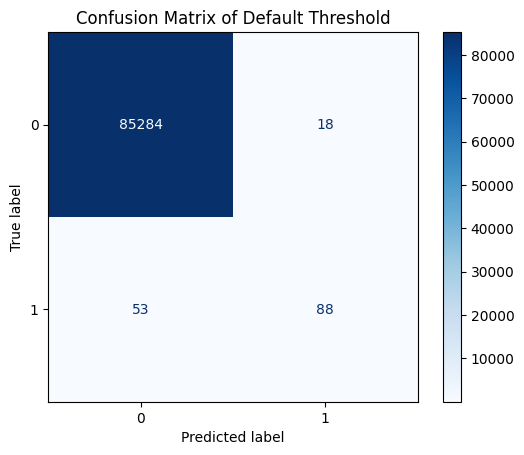

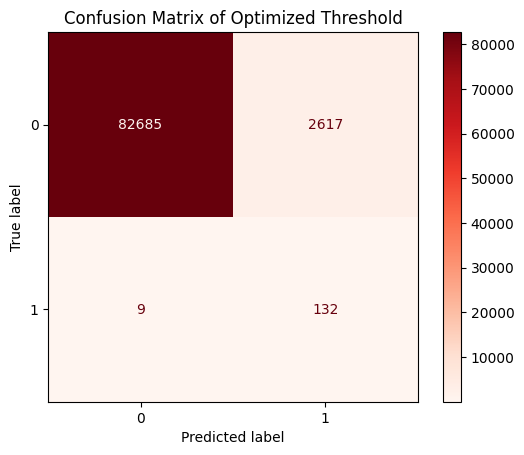

In [34]:
# Visualize the confusion matrix of default threshold
def_cm = confusion_matrix(y_test, def_y_pred)
def_disp = ConfusionMatrixDisplay(confusion_matrix=def_cm, display_labels=best_model.classes_)
def_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Default Threshold')
plt.show()

# Visualize the confusion matrix of optimized threshold
opt_cm = confusion_matrix(y_test, opt_y_pred)
opt_disp = ConfusionMatrixDisplay(confusion_matrix=opt_cm, display_labels=best_model.classes_)
opt_disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix of Optimized Threshold')
plt.show()

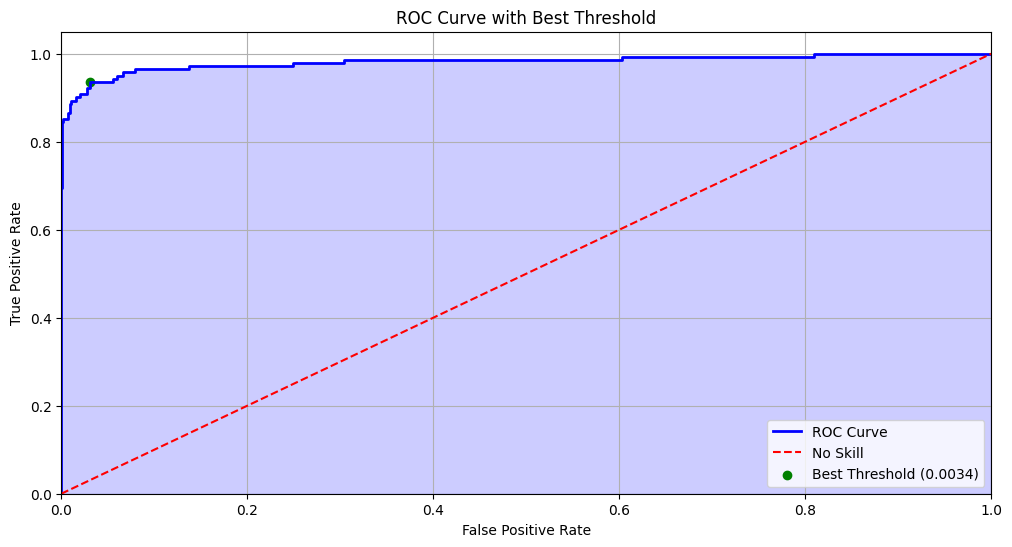

In [54]:
# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue', linewidth=2)
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Plot the diagonal 'No Skill' line
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No Skill')

# Highlight the best threshold point
plt.scatter(fpr[best_idx], tpr[best_idx], marker='o', color='green', label=f'Best Threshold ({best_thresh:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend()
plt.grid()
plt.show()

#### **Business Cost Modeling Evaluation**

In [63]:
# Calculate the cost of false positives and false negatives
def calculate_cost(y_true, y_pred):
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    # Assuming a cost of $300 for false positives
    cost_fp = FP * 300
    # Assuming a cost of $100,000 for every 10 lost customers (FN), plus $300 for each FN
    lost_cust = FN // 10
    cost_fn = (lost_cust * 100_000) + (FN * 300)
    return cost_fp, cost_fn, lost_cust

# Calculate costs for default and optimized thresholds
def_cost_fp, def_cost_fn, def_lost_cust = calculate_cost(y_test, def_y_pred)
opt_cost_fp, opt_cost_fn, opt_lost_cust = calculate_cost(y_test, opt_y_pred)
def_cost = def_cost_fp + def_cost_fn
opt_cost = opt_cost_fp + opt_cost_fn

cost_modeling_df = pd.DataFrame({
    'Model': ['Default Threshold', 'Optimized Threshold'],
    'Lost Customers': [def_lost_cust, opt_lost_cust],
    'FP Cost': [def_cost_fp, opt_cost_fp],
    'FN Cost': [def_cost_fn, opt_cost_fn],
    'Total Cost': [def_cost, opt_cost]
})
cost_modeling_df

,Model,Lost Customers,FP Cost,FN Cost,Total Cost
0,Default Threshold,5,5400,515900,521300
1,Optimized Threshold,0,785100,2700,787800


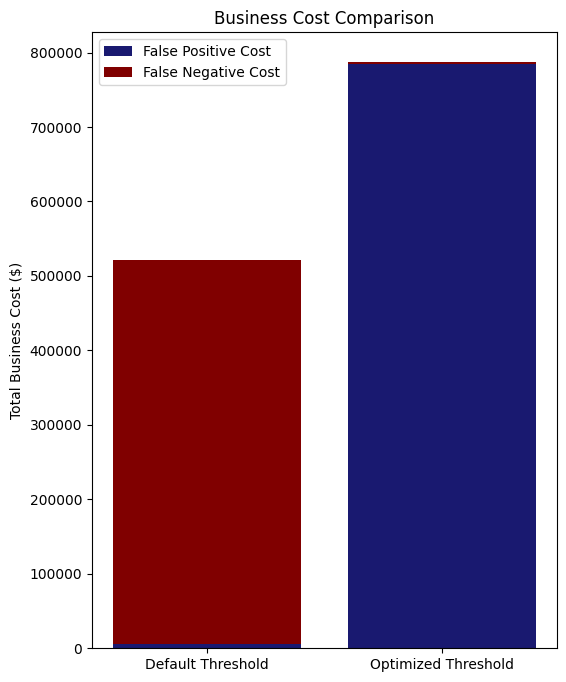

In [72]:
# Visualize the cost comparison with stacked bar chart
labels = ['Default Threshold', 'Optimized Threshold']
fp_costs = [def_cost_fp, opt_cost_fp]
fn_costs = [def_cost_fn, opt_cost_fn]

x = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots(figsize=(6, 8))
bar1 = ax.bar(x, fp_costs, width, label='False Positive Cost', color='midnightblue')
bar2 = ax.bar(x, fn_costs, width, bottom=fp_costs, label='False Negative Cost', color='maroon')

ax.set_ylabel('Total Business Cost ($)')
ax.set_title('Business Cost Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()